## Introduction
hill-climbing starts with a randomly chosen weight. But here, for
every episode, we add some noise to the weight. If the total reward improves, we update
the weight with the new one; otherwise, we keep the old weight. In this approach, the
weight is gradually improved as we progress through the episodes, instead of jumping


## import libraries

In [1]:
import torch
import gym
import matplotlib.pyplot as plt

##### Define cartpole environment

In [2]:
env = gym.make('CartPole-v0')

##### obtain dimensions of the observation and action space

In [3]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n

##### run each episode with specific weight

In [4]:
def run_episode(env, weight):
  state = env.reset()
  total_reward = 0
  is_done = False
  while not is_done:
    state = torch.from_numpy(state).float()
    action = torch.argmax(torch.matmul(state, weight))
    state, reward, is_done, _ = env.step(action.item())
    total_reward += reward
  return total_reward

In [5]:
n_episode = 1000
best_total_reward = 0
best_weight = torch.rand(n_state, n_action)
total_rewards = []
noise_scale = 0.01

In [6]:
for episode in range(n_episode):
  weight = best_weight + noise_scale * torch.rand(n_state, n_action)
  total_reward = run_episode(env, weight)
  print('Episode {}: {}'.format(episode+1, total_reward))
  if total_reward > best_total_reward:
    best_weight = weight
    best_total_reward = total_reward
    noise_scale = max(noise_scale / 2, 1e-4) #noise lower bound is 0.0001
  else:
    noise_scale = min(noise_scale*2 , 2) #noise upper bound is 2
  total_rewards.append(total_reward)

Episode 1: 32.0
Episode 2: 46.0
Episode 3: 39.0
Episode 4: 22.0
Episode 5: 29.0
Episode 6: 24.0
Episode 7: 53.0
Episode 8: 42.0
Episode 9: 22.0
Episode 10: 19.0
Episode 11: 51.0
Episode 12: 50.0
Episode 13: 50.0
Episode 14: 86.0
Episode 15: 56.0
Episode 16: 90.0
Episode 17: 75.0
Episode 18: 59.0
Episode 19: 200.0
Episode 20: 200.0
Episode 21: 43.0
Episode 22: 10.0
Episode 23: 73.0
Episode 24: 89.0
Episode 25: 165.0
Episode 26: 177.0
Episode 27: 102.0
Episode 28: 45.0
Episode 29: 55.0
Episode 30: 48.0
Episode 31: 200.0
Episode 32: 200.0
Episode 33: 46.0
Episode 34: 162.0
Episode 35: 200.0
Episode 36: 69.0
Episode 37: 200.0
Episode 38: 100.0
Episode 39: 10.0
Episode 40: 144.0
Episode 41: 49.0
Episode 42: 200.0
Episode 43: 109.0
Episode 44: 200.0
Episode 45: 200.0
Episode 46: 200.0
Episode 47: 69.0
Episode 48: 200.0
Episode 49: 74.0
Episode 50: 114.0
Episode 51: 200.0
Episode 52: 200.0
Episode 53: 173.0
Episode 54: 141.0
Episode 55: 185.0
Episode 56: 200.0
Episode 57: 98.0
Episode 58: 200

In [7]:
print("average reward in hill-climbing", sum(total_rewards)/n_episode)

average reward in hill-climbing 124.669


##### now, evalute best weight which obtained in hill-climbing.

In [8]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
  total_reward = run_episode(env, best_weight)
  print('Episode {}: {}'.format(episode+1, total_reward))
  total_rewards_eval.append(total_reward)

Episode 1: 179.0
Episode 2: 200.0
Episode 3: 126.0
Episode 4: 131.0
Episode 5: 129.0
Episode 6: 122.0
Episode 7: 114.0
Episode 8: 149.0
Episode 9: 121.0
Episode 10: 120.0
Episode 11: 131.0
Episode 12: 200.0
Episode 13: 149.0
Episode 14: 140.0
Episode 15: 159.0
Episode 16: 148.0
Episode 17: 115.0
Episode 18: 200.0
Episode 19: 118.0
Episode 20: 126.0
Episode 21: 104.0
Episode 22: 158.0
Episode 23: 200.0
Episode 24: 133.0
Episode 25: 180.0
Episode 26: 119.0
Episode 27: 139.0
Episode 28: 156.0
Episode 29: 200.0
Episode 30: 115.0
Episode 31: 101.0
Episode 32: 179.0
Episode 33: 184.0
Episode 34: 104.0
Episode 35: 171.0
Episode 36: 123.0
Episode 37: 158.0
Episode 38: 138.0
Episode 39: 95.0
Episode 40: 133.0
Episode 41: 185.0
Episode 42: 200.0
Episode 43: 152.0
Episode 44: 114.0
Episode 45: 190.0
Episode 46: 119.0
Episode 47: 141.0
Episode 48: 200.0
Episode 49: 125.0
Episode 50: 159.0
Episode 51: 161.0
Episode 52: 200.0
Episode 53: 127.0
Episode 54: 96.0
Episode 55: 186.0
Episode 56: 123.0
Epi

In [9]:
print('Average total reward over {} episode: {}'.format(n_episode_eval, sum(total_rewards_eval) / n_episode_eval))

Average total reward over 100 episode: 148.66


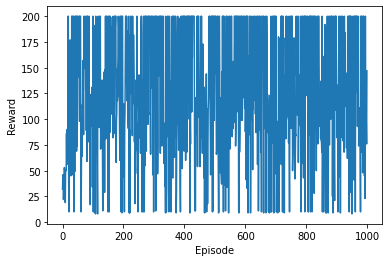

In [10]:
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()